# Once-through model run variable analysis

Run the models once-through, multiple times using the same optimisation parameter vector. Look at how the response variables change with successive runs for the same parameters.

In [1]:
%load_ext autoreload
%autoreload 2

import process
from process.main import SingleRun
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


In [2]:
input_file = "large_tokamak_once_IN.DAT"

# Run process on an input file in a temporary directory
single_run = SingleRun(str(input_file))
single_run.run()

The IN.DAT file does not contain any obsolete variables.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 3.0.0   Release Date :: 2023-09-12
   Tag No. : v3.0.0-25-g7260b34
    Branch : main
   Git log : Convert croco to Python
 Date/time : 19 Oct 2023 17:04:09 +01:00(hh:mm) UTC
      User : jon
  Computer : jon-Precision-3560
 Directory : /home/jon/code/notebooks/once_through
     Input : /home/jon/code/notebooks/once_through/large_tokamak_once_IN.DAT
 Run title : Gene

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
 93     2   BURN: Negative burn time available; reduce theat or raise PF coil V-s capability
 Floating point diagnostic values for this error:
   1)   -1.00000E+01
   2)   -1.77636E-15
   3)    4.16923E-02
   4)    1.00000E+01
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 


In [3]:
# Extract mfile data
# Remove last mfile: ony want model call numbered ones
Path("large_tokamak_once_MFILE.DAT").unlink(missing_ok=True)

mfile_paths = Path.cwd().glob("*MFILE.DAT")
mfile_runs = []

for mfile_path in mfile_paths:
    mfile = process.io.mfile.MFile(str(mfile_path))
    call_num = int(mfile_path.name.split(sep="_")[1])
    mfile_data = {"run": call_num}

    for var in mfile.data.keys():
        # Extract value
        mfile_data[var] = mfile.data[var].get_scan(-1)

    mfile_runs.append(mfile_data)

df = pd.DataFrame(mfile_runs)
df = df.set_index("run")
df = df.sort_index()
df

,normres001,normres002,normres003,normres004,normres005,normres006,normres007,normres008,normres009,normres010,...,username,runtitle,tagno,branch_name,commsg,fileprefix,ioptimz,minmax,error_status,error_id
run,,,,,,,,,,,,,,,,,,,,,
1,-0.19528,-0.080119,0.017262,0.25685,2.0351,1.8526,-1.00000,0.44522,-0.39752,-0.74265,...,jon,"""Generic large tokamak",v3.0.0-25-g7260b34,main,Convert,/home/jon/code/notebooks/once_through/large_to...,-2.0,1.0,NaN,NaN
2,-0.19532,-0.080036,0.019512,0.25685,2.0365,1.8539,-0.77175,0.44487,-0.39752,-0.79500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.19532,-0.080036,0.019512,0.25685,2.0365,1.8539,-0.77138,0.44487,-0.39752,-0.73188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.19532,-0.080036,0.019512,0.25685,2.0365,1.8539,-0.77138,0.44487,-0.39752,-0.73184,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,-0.19532,-0.080036,0.019512,0.25685,2.0365,1.8539,-0.77138,0.44487,-0.39752,-0.73184,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,-0.19532,-0.080036,0.019512,0.25685,2.0365,1.8539,-0.77138,0.44487,-0.39752,-0.73184,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,-0.19532,-0.080036,0.019512,0.25685,2.0365,1.8539,-0.77138,0.44487,-0.39752,-0.73184,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,-0.19532,-0.080036,0.019512,0.25685,2.0365,1.8539,-0.77138,0.44487,-0.39752,-0.73184,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,-0.19532,-0.080036,0.019512,0.25685,2.0365,1.8539,-0.77138,0.44487,-0.39752,-0.73184,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Check for variation
df.describe()

,normres001,normres002,normres003,normres004,normres005,normres006,normres007,normres008,normres009,normres010,...,pnetelmw/(powfmw+emultmw,pnetelmw/powfmw,cirpowfr,waterusetower,wateruserecirc,wateruseonethru,ioptimz,minmax,error_status,error_id
count,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000e+01,1.0,1.0,1.0,1.0
mean,-0.195316,-0.080044,0.019287,0.25685,2.036360,1.853770,-0.794279,0.444905,-0.39752,-0.739241,...,8.335030,9.921540,0.823931,37776.500000,12674.500000,1.242150e+06,-2.0,1.0,2.0,135.0
std,0.000013,0.000026,0.000712,0.00000,0.000443,0.000411,0.072283,0.000111,0.00000,0.019884,...,0.635714,0.756767,0.013427,4.743416,1.581139,1.581139e+02,NaN,NaN,NaN,NaN
min,-0.195320,-0.080119,0.017262,0.25685,2.035100,1.852600,-1.000000,0.444870,-0.39752,-0.795000,...,6.553500,7.800800,0.818920,37775.000000,12674.000000,1.242100e+06,-2.0,1.0,2.0,135.0
25%,-0.195320,-0.080036,0.019512,0.25685,2.036500,1.853900,-0.771380,0.444870,-0.39752,-0.731870,...,8.571625,10.203250,0.818920,37775.000000,12674.000000,1.242100e+06,-2.0,1.0,2.0,135.0
50%,-0.195320,-0.080036,0.019512,0.25685,2.036500,1.853900,-0.771380,0.444870,-0.39752,-0.731840,...,8.572300,10.204000,0.818920,37775.000000,12674.000000,1.242100e+06,-2.0,1.0,2.0,135.0
75%,-0.195320,-0.080036,0.019512,0.25685,2.036500,1.853900,-0.771380,0.444870,-0.39752,-0.731840,...,8.572300,10.204000,0.818935,37775.000000,12674.000000,1.242100e+06,-2.0,1.0,2.0,135.0
max,-0.195280,-0.080036,0.019512,0.25685,2.036500,1.853900,-0.771380,0.445220,-0.39752,-0.731840,...,8.572300,10.204000,0.861560,37790.000000,12679.000000,1.242600e+06,-2.0,1.0,2.0,135.0


Some vars have some variation (i.e. a standard deviation). Order by std:

In [5]:
# Filter for non-floats (e.g. strings) and NaNs
df_nums = df.select_dtypes(include=np.number)
df_nums = df_nums.dropna(axis=1) # Drop columns
stds = df_nums.std()
# Returns sorted copy only
stds.sort_values(ascending=False)

coe                3.348536e+21
qfuel              3.794733e+17
dlimit(4)          2.529822e+17
dntau*te           2.213594e+17
rndfuel            5.375872e+16
                       ...     
vforce_outboard    0.000000e+00
vforce             0.000000e+00
oacdcp             0.000000e+00
jwptf              0.000000e+00
insstrain          0.000000e+00
Length: 930, dtype: float64

Text(0.5, 0.98, 'Max-normalised variable values on successive model calls for largest\nmean-normalised standard deviation variables')

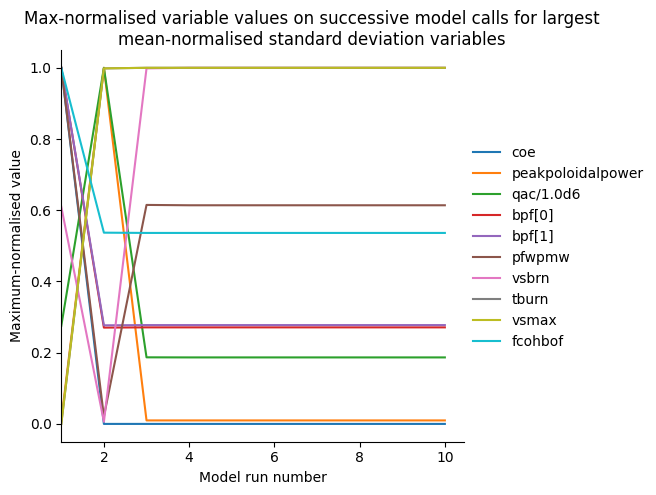

In [6]:
# Need to normalise stds first (std / mean)
# Std as fraction of mean
norm_stds = (stds / df_nums.mean())
sorted_norm_stds = norm_stds.sort_values(ascending=False)
sorted_norm_stds

# Get top 10 largest normalised stds by var name
largest_norm_stds_indexes = sorted_norm_stds[0:10].index
# Normalise to maximum values
norm_run_values_with_largest_rel_stds = df_nums[largest_norm_stds_indexes] / df_nums[largest_norm_stds_indexes].max()
norm_run_values_with_largest_rel_stds

# Plot
ax = sns.relplot(data=norm_run_values_with_largest_rel_stds, kind="line", dashes=False)
ax.set_ylabels("Maximum-normalised value")
ax.set_xlabels("Model run number")
ax.set(xlim=(1,None))
ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle("Max-normalised variable values on successive model calls for largest\nmean-normalised standard deviation variables")


## Actual data for a large-fluctuating variable

Text(0.5, 0.98, 'Absolute value of pfwpmw over multiple model runs')

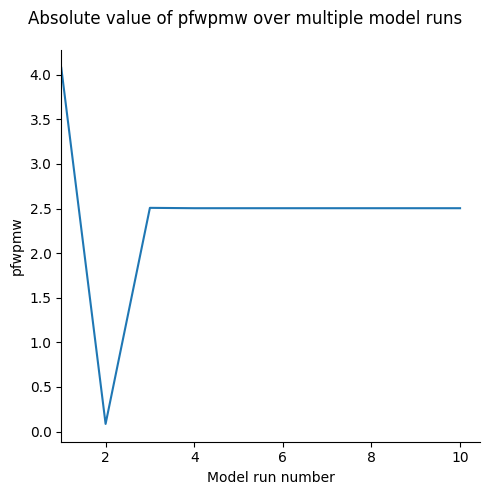

In [7]:
# Plot
ax = sns.relplot(data=df_nums["pfwpmw"], kind="line", dashes=False)
# ax = sns.lineplot(data=df_nums["pfwpmw"], dashes=False, marker="o")
# ax.set_ylabels("Maximum-normalised value")
ax.set_xlabels("Model run number")
ax.set(xlim=(1,None))
ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle("Absolute value of pfwpmw over multiple model runs")

## Any variations after 3 model evaluations?

In [8]:
df_nums_after_run_3 = df_nums.loc[3:, :]
df_nums_after_3_stds = df_nums_after_run_3.std()
df_nums_after_3_stds.sort_values(ascending=False)

bktcycles          12.020815
tcycle              0.919239
coe                 0.671751
cryv                0.353553
vsbrn               0.039598
                     ...    
bscf_iter89         0.000000
bscf_sauter         0.000000
bscf_nevins         0.000000
bscf_wilson         0.000000
wateruseonethru     0.000000
Length: 930, dtype: float64

Some still varying after 3 model runs. Check.

Text(0.5, 0.98, 'Max-normalised variable values on successive model calls for largest\nmean-normalised standard deviation variables still varying after 3 runs')

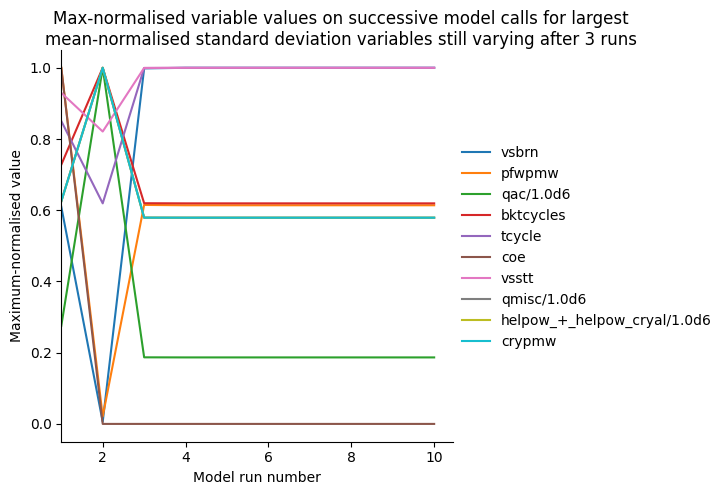

In [9]:
# Need to normalise stds first (std / mean)
# Std as fraction of mean
norm_stds_after_3 = (df_nums_after_3_stds / df_nums_after_run_3.mean())
sorted_norm_stds_after_3 = norm_stds_after_3.sort_values(ascending=False)
sorted_norm_stds_after_3

# Get top 10 largest normalised stds by var name
largest_norm_stds_after_3_indexes = sorted_norm_stds_after_3[0:10].index
# Normalise to maximum values
norm_run_values_with_largest_rel_stds_after_3 = df_nums[largest_norm_stds_after_3_indexes] / df_nums[largest_norm_stds_after_3_indexes].max()
norm_run_values_with_largest_rel_stds_after_3

# Plot
ax = sns.relplot(data=norm_run_values_with_largest_rel_stds_after_3, kind="line", dashes=False)
ax.set_ylabels("Maximum-normalised value")
ax.set_xlabels("Model run number")
ax.set(xlim=(1,None))
ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle("Max-normalised variable values on successive model calls for largest\nmean-normalised standard deviation variables still varying after 3 runs")

Text(0.5, 0.98, 'Absolute value of vsbrn from model run 3 onwards')

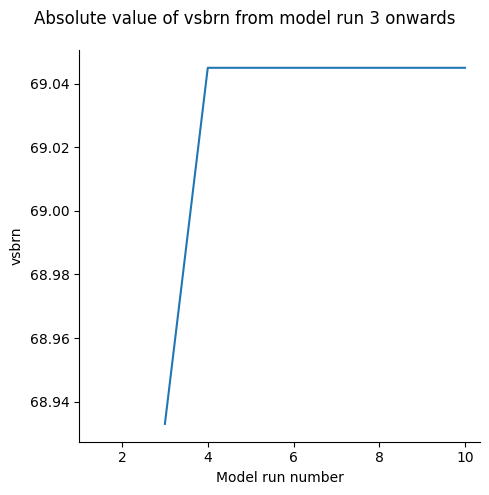

In [10]:
# Plot
ax = sns.relplot(data=df_nums.loc[3:,"vsbrn"], kind="line", dashes=False)
# ax = sns.lineplot(data=df_nums["pfwpmw"], dashes=False, marker="o")
# ax.set_ylabels("Maximum-normalised value")
ax.set_xlabels("Model run number")
ax.set(xlim=(1,None))
ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle("Absolute value of vsbrn from model run 3 onwards")

## Proportion that varies

(1.0, 9.4)

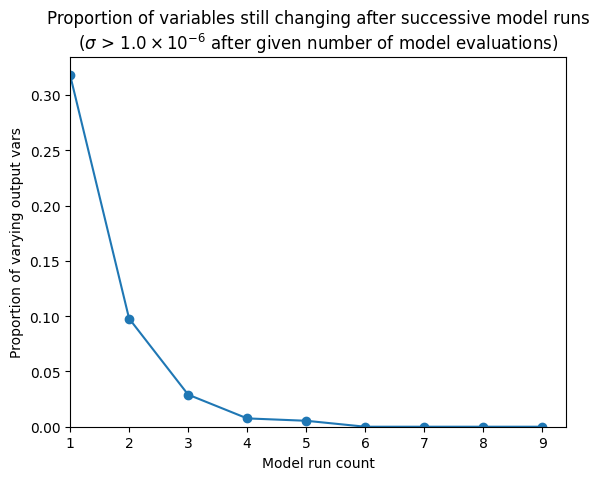

In [51]:
# Proportion of variables that are still varying after certain number of calls
proportion_varying = []
# Find std for 10 latest rows, then 9, then 8, ... to last 2 rows
for i in range(1, df_nums.shape[0]):
    stds_after_run_i = df_nums.loc[i:].std()
    still_varying_count = stds_after_run_i[stds_after_run_i > 1.0e-6].count() / stds_after_run_i.count()
    proportion_varying.append(still_varying_count)
    
fig, ax = plt.subplots()
ax.plot(range(1, 10), proportion_varying, "-o")
ax.set_ylabel("Proportion of varying output vars")
ax.set_xlabel("Model run count")
ax.set_title("Proportion of variables still changing after successive model runs\n" + r"($\sigma$ > $1.0\times10^{-6}$ after given number of model evaluations)")
ax.set_ylim(0, None)
ax.set_xlim(1, None)